**Analysis of Pulsar Data**

*Dataset: https://www.kaggle.com/brsdincer/pulsar-classification-for-class-prediction*

In this analysis we will look at the pulsar data provided above.\
This dataset provides the variables that are used in classifying whether the event is a pulsar or not.\

Pulsars are found by analysing the pulses of energy coming from them. Because each individual pulse can look drastically different, it is nearly impossible to identify pulsars off of a single pulse. Instead the pulses are averaged out into a single pulse that have the following variables (the first four variables in the dataset):

Mean_Integrated - The mean of the obvervations\
SD - Standard deviation of the obvervations\
EK - Excess kertosis of observations (best explained of the shape of the pulse/curse)\
Skewness - The amount of asymmetry in the observed pulse

Because the energy from pulsars travel through space, the pulse/energy slows down due to interferrence with electrons in space. These delays in the pulse is described by another curve, the DM-SNR ("dispersion-measure-signal-to-noise-ratio"). The DM-SNR is described by four similar variables (variables 4 through 8 in the dataset):

Mean _ DMSNR _ Curve: Mean of DM SNR curve (note - Mean of DMSNR is the root of reduction/interference)\
SD _ DMSNR _ Curve: Standard deviation of DM SNR curve\
EK _ DMSNR _ Curve: Excess kurtosis of DM SNR curve (shape of curve)\
Skewness _ DMSNR _ Curve: amount of asymmerty in the DM SNR curve

The last variable is:

Class - Whether observations are from a pulsar or not (1 denotes pulsar, 0 denotes not a pulsar)

First we import all libraries that we will need for analysis

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,6)

We create a dataframe named df_pulsar from the csv files Pulsar.csv

In [49]:
df_pulsar = pd.read_csv('Pulsar.csv')

Next we call the .info() method

In [50]:
df_pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


We see that all 8 variables to describe the pulsar are float types, class is an integer.\
We can also see there are 17,898 entries with no null fields.

\
\
Next we call the .head() .describe() methods on the dataframe\
We will then group by 'Class' and call the .mean() method

In [51]:
df_pulsar.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [52]:
df_pulsar.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [53]:
df_pulsar.groupby(['Class']).mean()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
Class,,,,,,,,
0,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344
1,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728


We can see that there appears to be a distinct change between the means of each variable depending on if the observation means are from a pulsar(1) or not(0).





We now create box plots for each variable, still grouped by 'Class' to compare plots of confirmed pulsars against non-pulsars.

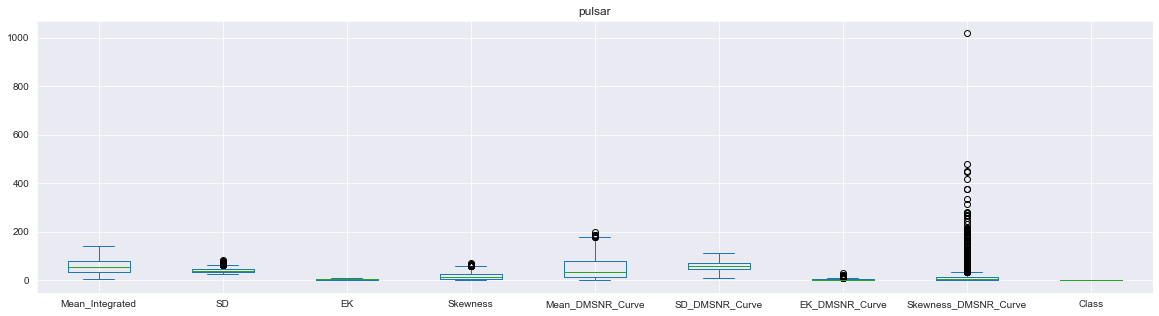

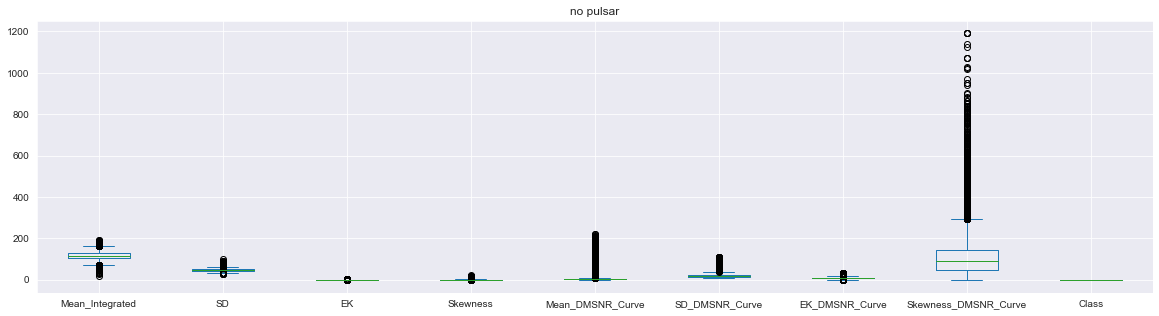

In [54]:
pulsar1 = df_pulsar[df_pulsar.Class == 1]  #creating dataframe pulsar1 that only has observations of pulsars
pulsar0 = df_pulsar[df_pulsar.Class == 0]  #creating dataframe pulsar0 that has observations of non-pulsars

pulsar1.plot(kind='box', title='pulsar')  #plotting box plot for pulsar1
pulsar0.plot(kind='box', title='no pulsar')  #plotting box plot for pulsar0
plt.show()

We can observe some differences in the box plots between observations of pulsars and non-pulsars. But it is hard to see the amount change between both plots.

To see the relative change for each variable between pulsars and non-pulsars we will create a box plot viaualization with both categories (pulsars and non-pulsars) and a normalized y-axis scale. 

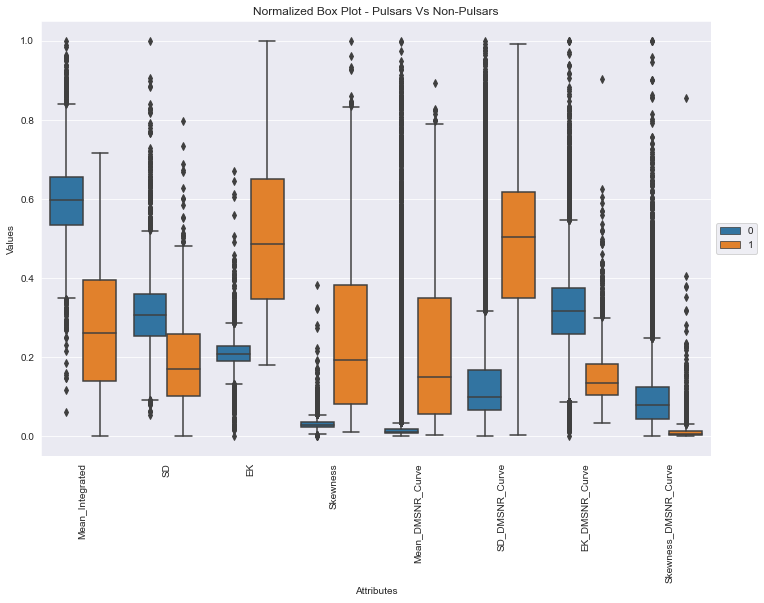

In [55]:
from sklearn.preprocessing import MinMaxScaler #import needed MinMaxScalter

#create a new dataframe that scales/normalizes each variable using MinMaxScaler, then add the binary 'Class' variable to new dataframe
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_pulsar.iloc[:, :]))
df_scaled.columns = df_pulsar.columns[:]
df_scaled['Class'] = df_pulsar['Class']

df_scaled_melted = df_scaled.iloc[:, :].melt(id_vars='Class', var_name='Attributes', value_name='Values')

#create seaborn box plot on the melted dataframe, setting hue to 'Class' to differentiate between pulsars and not
plt.figure(figsize=(12, 8))
g = sns.boxplot(x='Attributes', y='Values', hue='Class', data=df_scaled_melted)
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Normalized Box Plot - Pulsars Vs Non-Pulsars')
#plt.show()
plt.savefig('highrez-normbox.png', transparent = True, dpi=300)

Now we can see the various differences in medians, IQR, and amount of outliers depending on if the data is from a pulsar or not.

Seeing that there is a major difference in variables between pulsars and not shows that we might be able to predict if given data is a pulsar using the above variables.

Next we will sort the data by 'Class' and create scatter plots using each variable as the y-axis and index and x-axis.\
*(Note while this might look like a time series, the x-axis is arbitrary and only sorted in a way to make see the difference in 'Class' easier)*

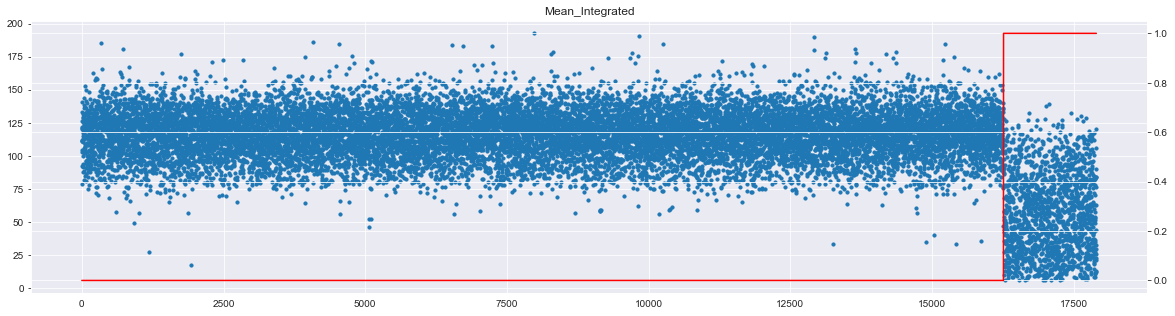

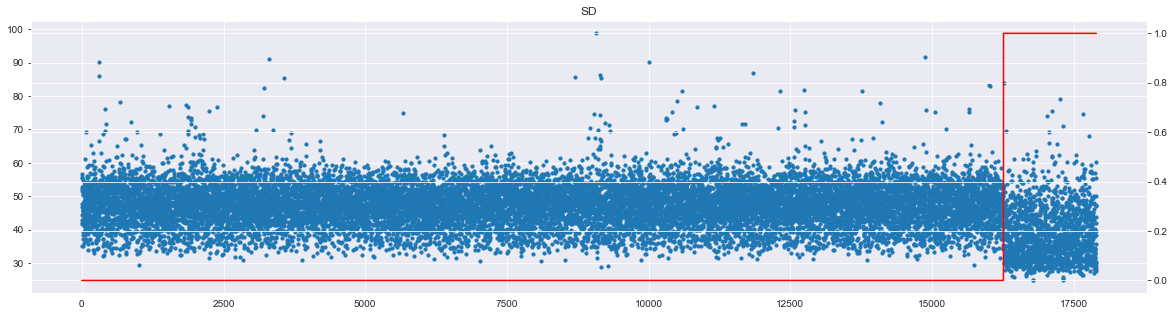

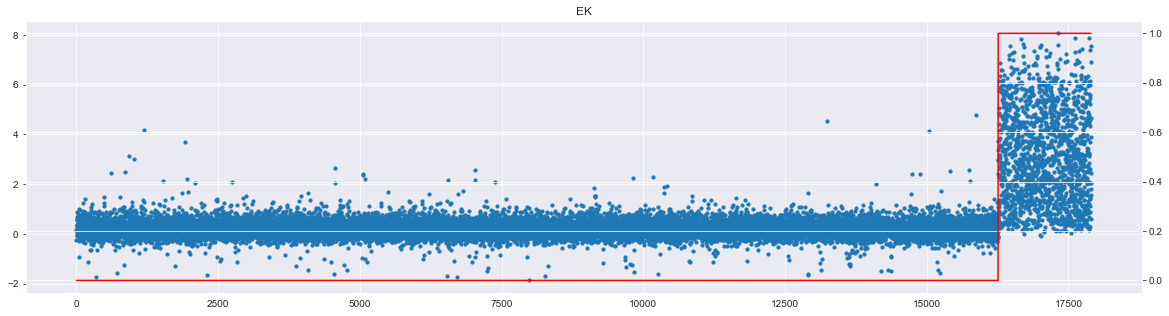

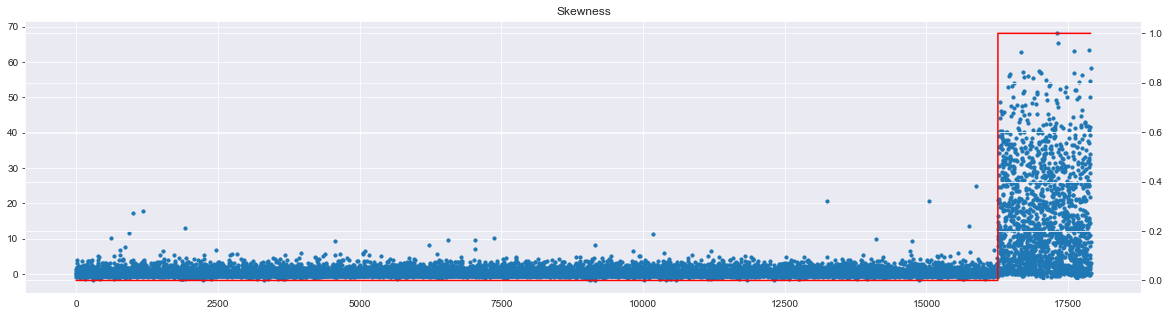

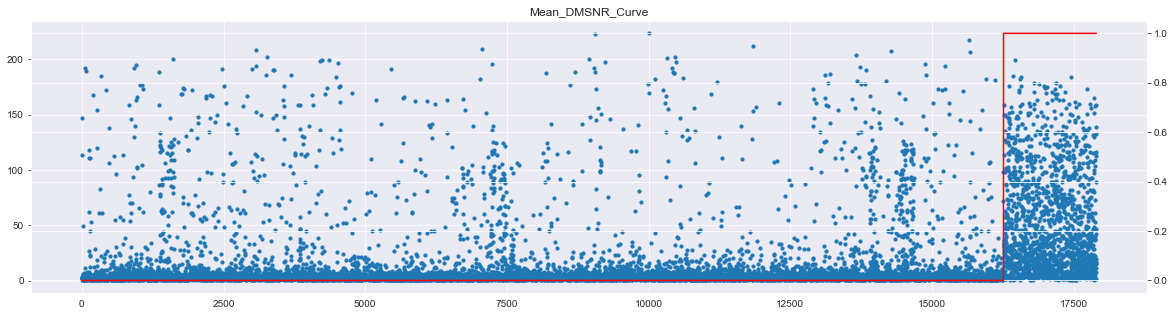

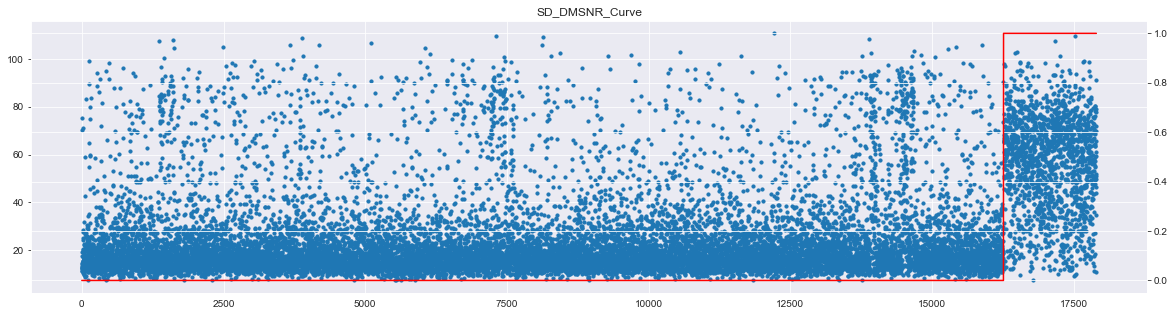

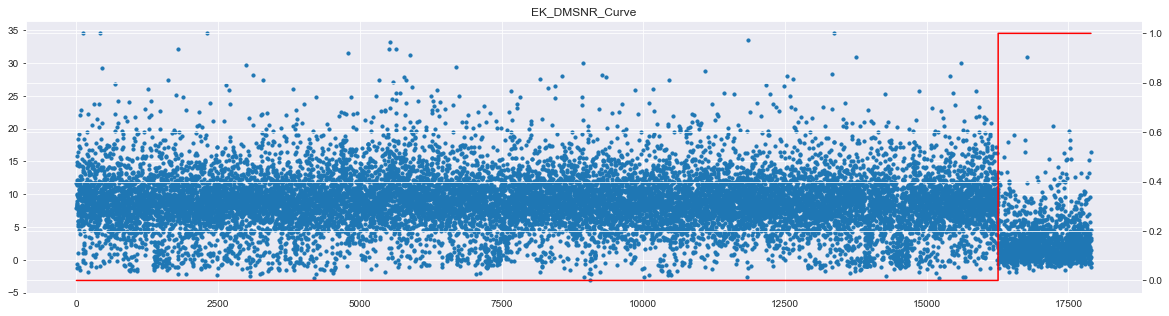

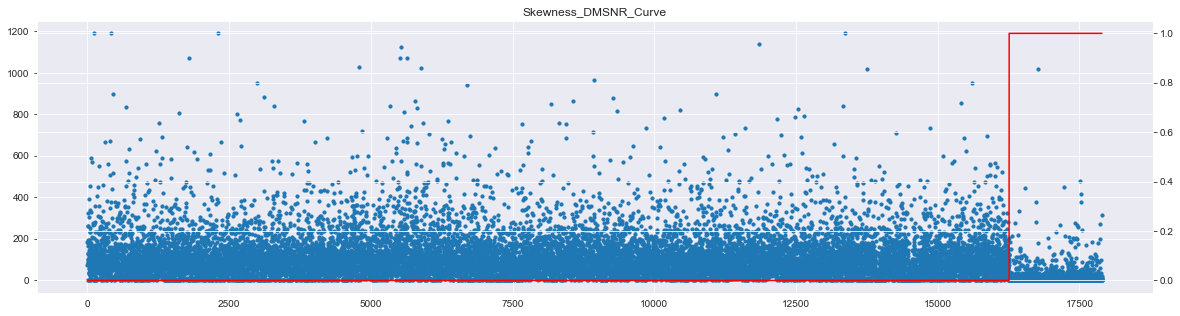

In [56]:
sorted_pulsar = df_pulsar.sort_values(by=['Class'])  #sort dataframe by 'Class'
sorted1 = sorted_pulsar.reset_index(drop=True)  #reset index so sorted index can be used as a plot axis
Variables = list(sorted_pulsar.drop(columns='Class'))  #create list of column names for use in for loop

#create for loop to create individual scatter plots to look at data disribution whether pulsar or not
for item in Variables:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.scatter(sorted1.index, sorted1[item], s=10)
    ax2.plot(sorted1['Class'], color='r')
    plt.title(item)
    #plt.show()
    plt.savefig('highrez-scatter'+item+'.png', transparent = True, dpi=300)

As we can see with the above visuals the distribution of data changes a fair amount depending on if the data is from a pulsar or non-pulsar. But even though the distribution visibly changes we must remember that the data is currently sorted on known classifications of pulsar or not.\
This means that even though we can see a visible diffence with the known data, we still need help with predicting new data since there are many viable outliers in the data.

Next we will look at scatter plots between each variable, with the difference classes of pulsar being denoted with different colors.

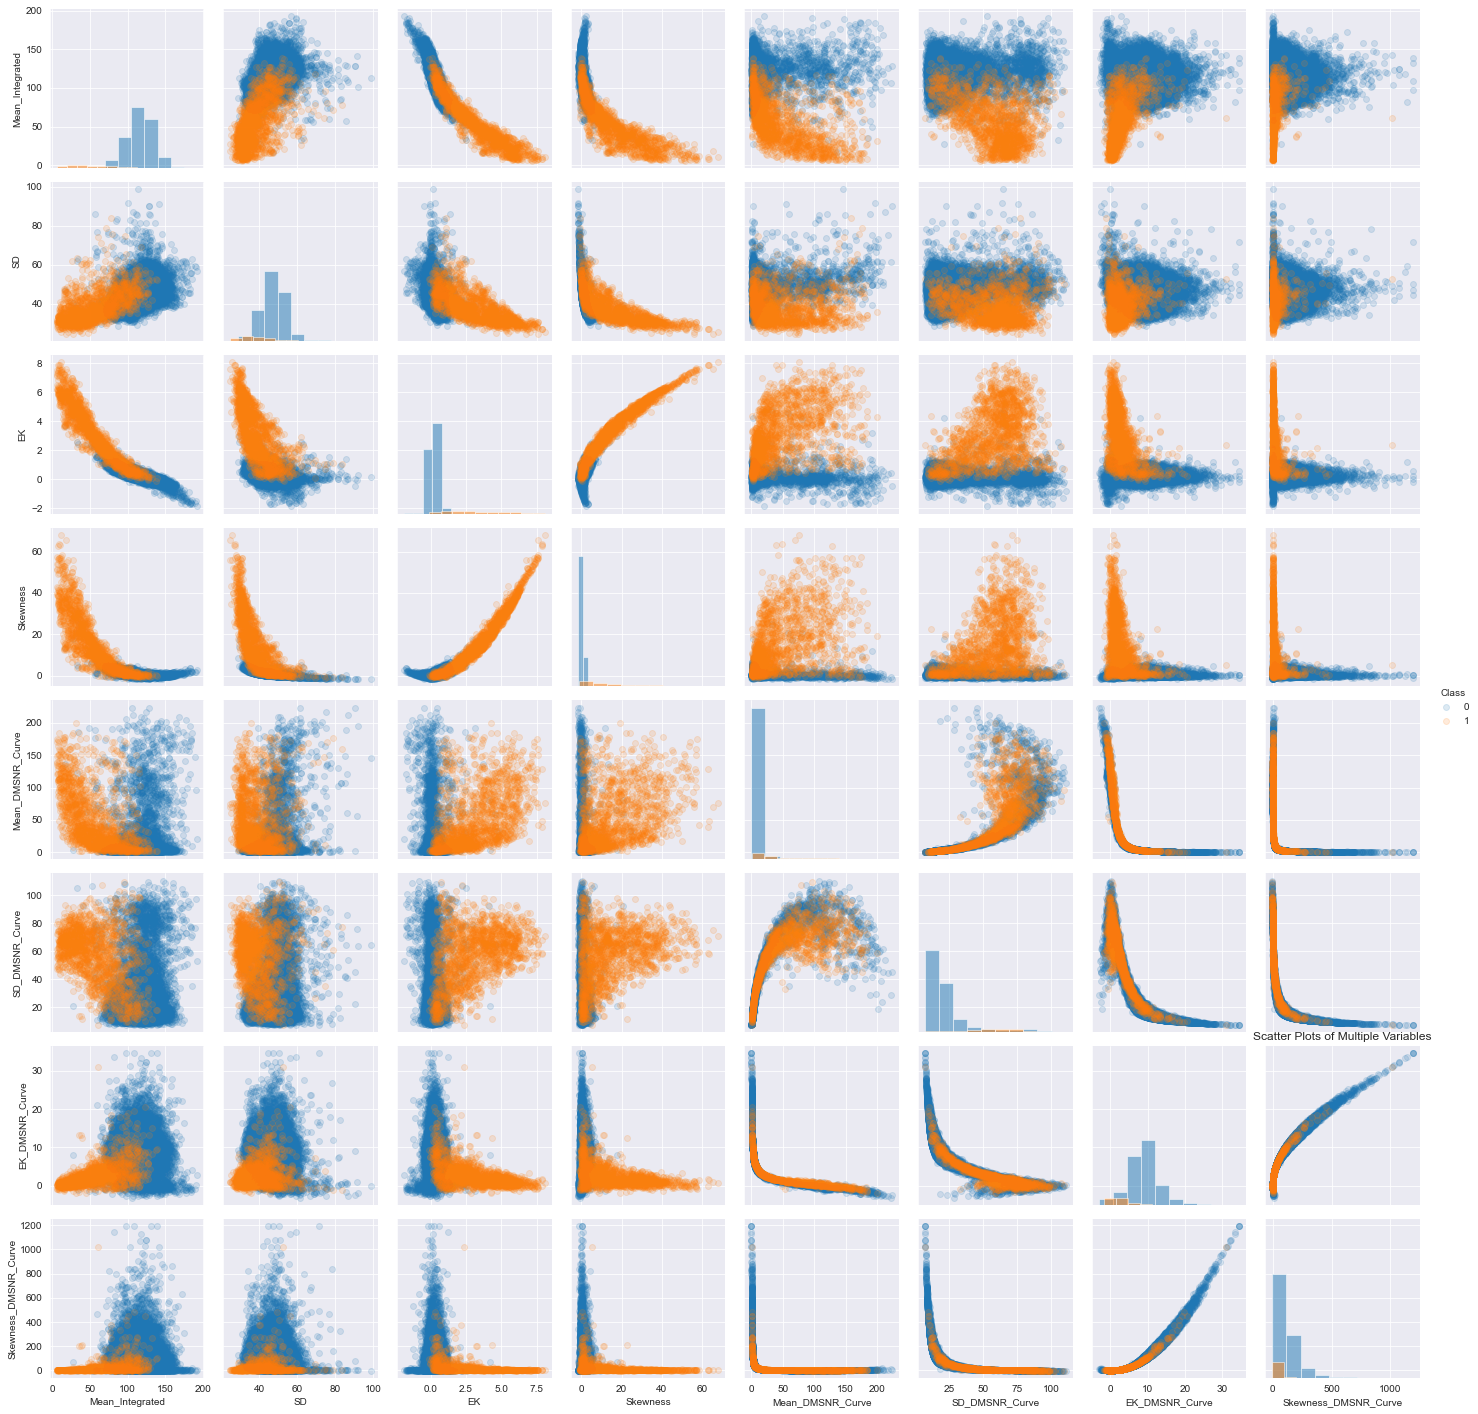

In [57]:
#creating a PaidGrid to visualize scatter plots for each variable - histagrams are shown when a single varialbe is looking at itself
pulsar_graph = sns.PairGrid(df_pulsar, hue='Class')
pulsar_graph.map_diag(plt.hist, alpha=0.5)
pulsar_graph.map_offdiag(plt.scatter, alpha=0.15)
pulsar_graph.add_legend()
plt.title('Scatter Plots of Multiple Variables')
#plt.show()
plt.savefig('highrez-pairgrid.png', transparent = True, dpi=300)

From the above scatter plots we can see that the 4 varaibles for the normal pulse curve are correlated to each other and the 4 variables for the DM SNR curve are also correlated to each other.

We can see that most of the plots show a good amount of overlap between Pulsars and Non-Pulsars, but a few variables (EK, Skewness, and Mean_DMSNR_Curve) show a fair split between pulsar data and non-pulsar data.

Next we will look at a correlated heatmap to see if the above variables (EK, Skewness, and Mean_DMSNR_Curve) are correlated to Class like we believe.

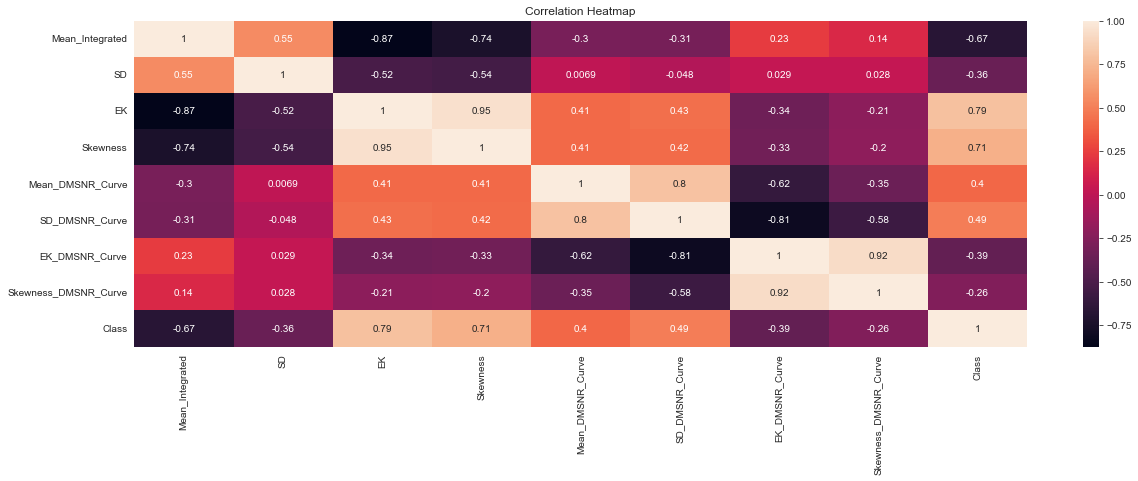

In [73]:
#creating correlated dataframe using .corr() then creating a heatmap using sns.heatmap()
pulsar_corr = df_pulsar.corr()
sns.heatmap(pulsar_corr, annot=True)
plt.title('Correlation Heatmap')
plt.savefig('highrez-heatmap2.png', transparent = True, dpi=300)

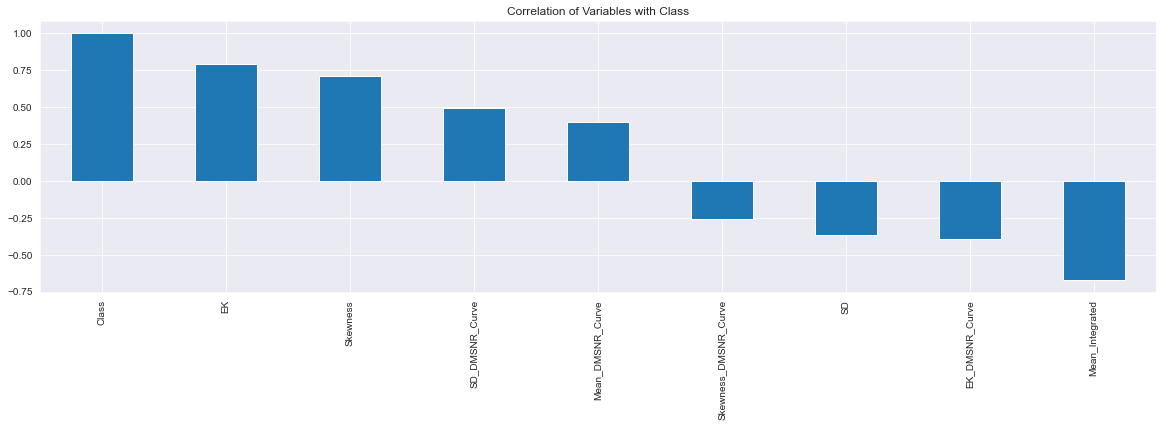

In [59]:
pulsar_corr['Class'].sort_values(ascending=False).plot(kind='bar', title='Correlation of Variables with Class')
plt.savefig('highrez-corr.png', transparent = True, dpi=300)

We can see that EK, Skewness, and Mean_Integrated are the three variables that show the highest correlation to class.\
But we can see that there is a decent amount of multicollinearity between the variables that could affect our regression models going forward.

So we next we will look at VIF scores to determine if the multicollinearity will pose a problem for us. (We will look for scores of <5)

In [60]:
#define a function that will calculate the VIF that will determine the multicollinearity of each variable.
def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = 'Class'
print(get_VIF(df_pulsar,target))

const                   292.475360
Mean_Integrated           7.314004
SD                        1.802070
EK                       29.863295
Skewness                 16.064178
Mean_DMSNR_Curve          3.590775
SD_DMSNR_Curve            7.509865
EK_DMSNR_Curve           38.710816
Skewness_DMSNR_Curve     20.718833
dtype: float64


/Users/andrew/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
ek_drop = df_pulsar.drop(columns=['EK','EK_DMSNR_Curve'])
print(get_VIF(ek_drop,target))

const                   104.899769
Mean_Integrated           2.377583
SD                        1.672926
Skewness                  2.730375
Mean_DMSNR_Curve          3.039896
SD_DMSNR_Curve            3.826129
Skewness_DMSNR_Curve      1.566661
dtype: float64


In [62]:
skew_drop = df_pulsar.drop(columns=['Skewness','Skewness_DMSNR_Curve'])
print(get_VIF(skew_drop,target))

const               173.508141
Mean_Integrated       4.512250
SD                    1.552976
EK                    5.072430
Mean_DMSNR_Curve      2.890195
SD_DMSNR_Curve        5.083277
EK_DMSNR_Curve        2.927152
dtype: float64


We can see that the normal dataframe shows high VIF scores that will most likely affect our regression models.\
Looking at the new ek_drop and Skewness_drop dataframes, the VIF scores become much better.\
Will use the ek_drop dataframe for regression modeling (as well as the overall dataframe for reference)

Next we will create the logarithmic regression model from the ek_drop database

In [63]:
ek_drop_ind = ek_drop.drop(columns='Class')
ek_drop_dep = ek_drop['Class']
ek_drop_ind = sm.add_constant(ek_drop_ind)

ek_model = sm.Logit(ek_drop_dep, ek_drop_ind).fit()
print(ek_model.summary())

Optimization terminated successfully.
         Current function value: 0.087180
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                17898
Model:                          Logit   Df Residuals:                    17891
Method:                           MLE   Df Model:                            6
Date:                Tue, 18 Jan 2022   Pseudo R-squ.:                  0.7153
Time:                        11:06:58   Log-Likelihood:                -1560.4
converged:                       True   LL-Null:                       -5479.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.3015      0.663     -4.979      0.000      -4.601      -2.00

From the regression summary we see that the pseudo R-squared value is 0.7153 which means that the model is a decent fit to the data.\
We also see that Skewness has the largest coefficient of the variables, meaning it contributes to the slope of the model the most.

Next we will look into how well the regression model fits the actual data

In [64]:
from sklearn import metrics

X = ek_drop_ind
y = ek_drop_dep

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=30000).fit(X_train, y_train)

In [65]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4902   24]
 [ 100  344]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4926
           1       0.93      0.77      0.85       444

    accuracy                           0.98      5370
   macro avg       0.96      0.88      0.92      5370
weighted avg       0.98      0.98      0.98      5370



From the above tests and metrics we can see that the model is very good at matching the data for non-pulsars. The model is less accurate for classifying pulsars (1), but still within an acceptable range. The model has good precision in classifying pulsars, meaning that the model is good at not identifying non-pulsars as pulsars (limited false positives). The model does seem to be only adequate for recall, meaning that the model does miss about 22% of actual pulsars, categorizing them as non-pulsars (false negatives).

***Conclusions***

Overall the model we created does a good job at classifying pulsars without giving false positives. This means that while the model might not be *as* good at finding *all* of the pulsars, it has an accuracy of 93% that the pulsars it predict are actual pulsars and not false positives. This is good if you want a model that can classify positive pulsars accurately and are not as worried about finding all pulsars.

From our analysis we found that the variables 'Ek' (Excess Kurtosis), 'Skewness', and 'Mean_Integrated' had the highest correlation in relation to our dependent variable 'Class' (classification of pulsar). While these three variables had the highest correlation to 'Class', we also saw that 'EK' and 'Skewness' were highly correlated to each other (0.95). Upon realizing this correlation we decided to look at the VIF scores of the variables, and upon scoring each variable we decided to drop both 'EK' and 'EK_DMSNR_Curve'.

After dropping the variables 'EK' and Ek_DMSNR_Curve' we used a logarithmic regression model to predict 'Class'. This model has a pseudo r-squared score of 0.7153, proving to be a good fit, with the variable 'Skewness' having the biggest impact within the model with a coefficient of 0.5384.

This analysis has shown which variables has the highest correlation in classifying a pulsar, and created an accurate regression model for classification. This model is shown to be good at accurately finding pulsars with few false positives, but slightly struggles at finding *all* pulsars. To improve classification prediction models I would recommend further analysis using machine learning, where it could hopefully descrease the amount of false negatives predicted, leading to accurate classification of more pulsars.

***The Rest of the Analysis is for Limited Visualization of Prediction Model as well as Scoring Model using Full Data***

Next we will plot the modeled prediction values vs the actual class values, against the Skewness variable.

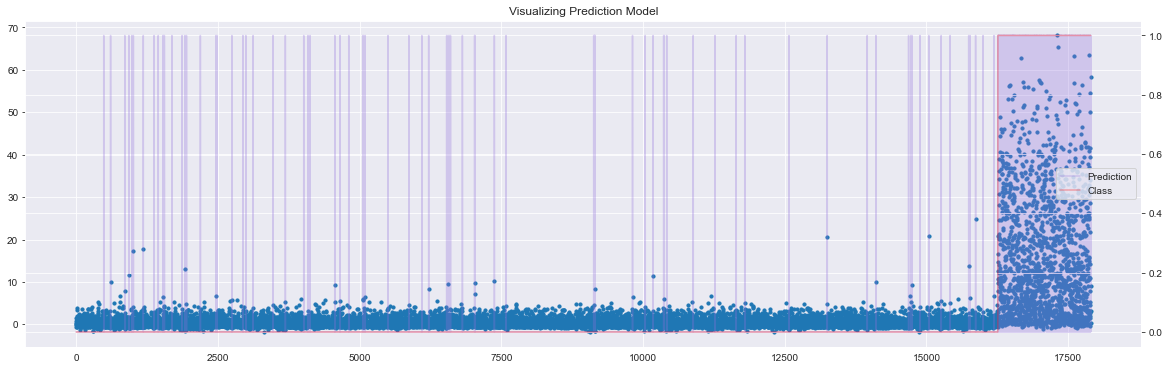

In [74]:
#does calling the ek_model regression model with the ind variables from above work with new full pulsar data?

pulsar_test = pd.read_csv('Pulsar.csv')
pulsar_test['Prediction'] = (ek_model.predict(ek_drop_ind) >= 0.5).astype(int)

sorted_pulsar1 = pulsar_test.sort_values(by=['Class'])
pulsar_reg1 = sorted_pulsar1.reset_index(drop=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(pulsar_reg1.index, pulsar_reg1['Skewness'], s=10)
#pulsar_reg1[['Skewness']].plot(ax=ax1)
pulsar_reg1[['Prediction','Class']].plot(color=['mediumpurple','r'],ax=ax2, alpha=0.3)

plt.title('Visualizing Prediction Model')
#plt.show()
plt.savefig('highrez-predict.png', transparent = True, dpi=300)

In [ ]:
print('Correct Predictions','\n',pulsar_test[pulsar_test['Prediction'] == pulsar_test['Class']]['Class'].value_counts())
print('Incorrect Predictions','\n',pulsar_test[pulsar_test['Prediction'] != pulsar_test['Class']]['Class'].value_counts())
print(pulsar_test['Prediction'].value_counts())
print(pulsar_test['Class'].value_counts())

In [ ]:
print(classification_report(pulsar_test['Class'],pulsar_test['Prediction']))

In [ ]:
#Creating new variables for use in Tableau for ease of analysis
pulsar_test['False Negatives'] = np.where((pulsar_test['Prediction']==0) & (pulsar_test['Class']==1),1,0)
pulsar_test['False Positives'] = np.where((pulsar_test['Prediction']==1) & (pulsar_test['Class']==0),1,0)